#### Etsy Reviews Data EDA 

In [2]:
#imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('data/etsy_shops_clean.csv')

In [8]:
df.head(2)

,seller_location,seller_join_date,sales_count,number_of_reviews,average_review_score,number_of_items
0,"Soorts-Hossegor, France",2017,14,2.0,4.0,0
1,"Arizona, United States",2016,137,18.0,5.0,15


In [59]:
df.shape

(169059, 6)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169059 entries, 0 to 169058
Data columns (total 6 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   seller_location       169059 non-null  object 
 1   seller_join_date      169059 non-null  int64  
 2   sales_count           169059 non-null  int64  
 3   number_of_reviews     169059 non-null  float64
 4   average_review_score  169059 non-null  float64
 5   number_of_items       169059 non-null  int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 7.7+ MB


In [61]:
df.isnull().sum()

seller_location         0
seller_join_date        0
sales_count             0
number_of_reviews       0
average_review_score    0
number_of_items         0
dtype: int64

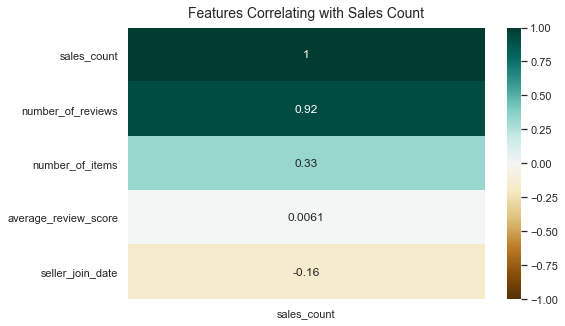

In [66]:
# plot feature correlation heatmap
plt.figure(figsize=(8, 5))
heatmap = sns.heatmap(df.corr()[['sales_count']].sort_values(by='sales_count', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Sales Count', fontdict={'fontsize':14}, pad=10);

It looks like number of reviews and number of items are most correlated features with the target

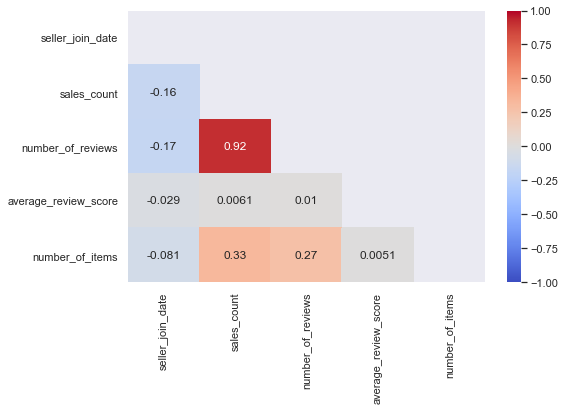

In [67]:
# plot heatmap to test to multicollinearity
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(8, 5))
sns.heatmap(
    df.corr(),
    cmap='coolwarm',
    annot=True,
    mask = mask,
    vmin = -1.,
    vmax = 1.
    
);

Do not observe multicollinearity between features

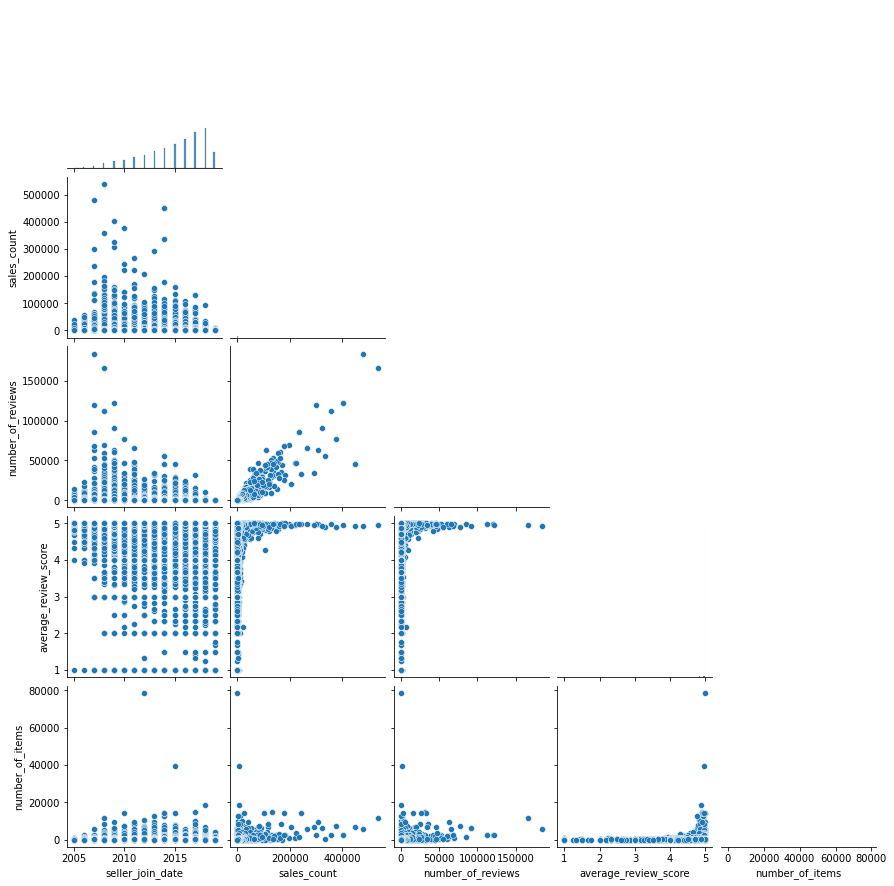

In [12]:
# plot pairplot for data elements

sns.pairplot(df, corner = True);

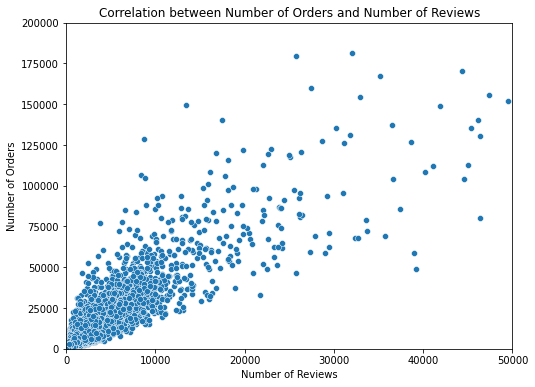

In [26]:
fig, ax = plt.subplots(figsize = (8, 6))
sns.scatterplot(data=df, x="number_of_reviews", y="sales_count")
plt.title('Correlation between Number of Orders and Number of Reviews')
plt.xlim(0, 50_000)
plt.ylim(0, 200_000)
plt.xlabel('Number of Reviews')
plt.ylabel('Number of Orders')
plt.savefig('EDA/charts/Correlation of Orders and Reviews');

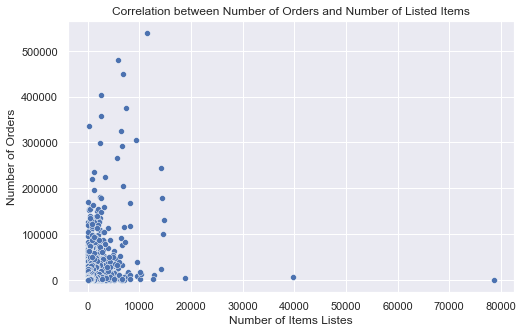

In [62]:
fig, ax = plt.subplots(figsize = (8, 5))
sns.scatterplot(data=df, x="number_of_items", y="sales_count")
plt.title('Correlation between Number of Orders and Number of Listed Items')
plt.xlabel('Number of Items Listes')
plt.ylabel('Number of Orders')
plt.show();

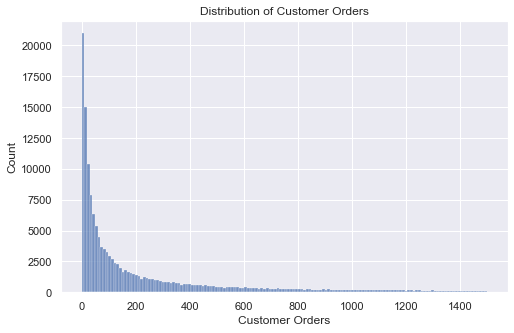

In [64]:
fig, ax = plt.subplots(figsize=(8, 5))  
sns.histplot(data=df, x=df[df['sales_count'] <= 1500]['sales_count'])
plt.title('Distribution of Customer Orders')
plt.xlabel('Customer Orders')
plt.show();

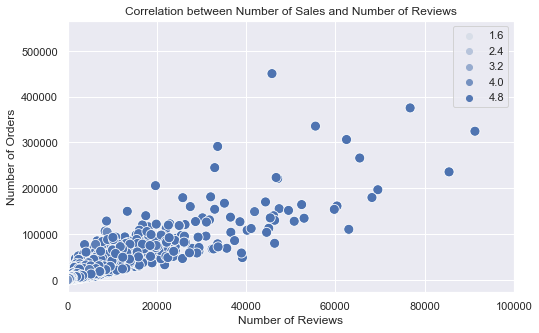

In [53]:
fig, ax = plt.subplots(figsize=(8, 5))    
palette = sns.color_palette("bright", 6)
sns.scatterplot(ax=ax, x="number_of_reviews", y="sales_count", hue="average_review_score", data=df, 
                marker='o', s=100, palette='light:b')
ax.legend(bbox_to_anchor=(1, 1), ncol=1)
ax.set(xlim = (0,100_000))
plt.title('Correlation between Number of Sales and Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Number of Orders')
plt.show()

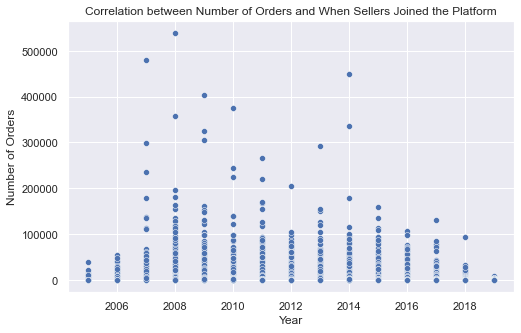

In [65]:
fig, ax = plt.subplots(figsize = (8, 5))
sns.scatterplot(data=df, x="seller_join_date", y="sales_count")
plt.title('Correlation between Number of Orders and When Sellers Joined the Platform')
plt.xlabel('Year')
plt.ylabel('Number of Orders')
plt.show();